# The problem setting
* We have $n$ *features* for $m$ units, just like a classification problem. 
* But unline classification, there is no 'labels'.
* We want to "discover" similar "groups" AKA **clusters**. 


![](https://cssanalytics.files.wordpress.com/2013/11/cluster-image.png)

## Examples
* Given a set of news article, cluster them by topics.
* Given geometrical properties of petals of different flowers, cluster them by species. 

# K-means clustering
## The mathematics

%%latex
For a set of feature vectors $S=\{\mathbf{x}_i: 1<i<N\}$, minimize over all possible partitions of the set $S$ into $k$ subsets:
$$
{\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}\sum _{\mathbf {x} \in S_{i}}\left\|\mathbf {x} -{\boldsymbol {\mu }}_{i}\right\|^{2}={\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}|S_{i}|\operatorname {Var} S_{i}
$$

What it means:
* "in-cluster variance" is minimized.


**IMPORTANT:** A definition of "distance" is crucial for clustering to function.

It is not so trivial to decide on a definition of distance, when different features are disparate: e.g. Budget of a movie and number of cars appearing in it. 
There is no one-definition-fit all criteria. One common choice is the **Minkowski metric**:
$$
d(\mathbf{x}, \mathbf{y}) = \left(\sum_{i=1}^p \left|x_{i,k}-y_{i,k}\right|\right)^{1/p}
$$


In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

## K-means

In [15]:
df = sns.load_dataset('iris')

In [16]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
num_species = len(set(df['species']))

In [18]:
import sklearn.cluster as cl

In [19]:
mkm = cl.KMeans(n_clusters=num_species)
mkm.fit(df.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
df.loc[:, 'computed_label'] = mkm.labels_

In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,computed_label
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [22]:
species_list = tuple(df['species'])
computed_label_list = tuple(df['computed_label'])

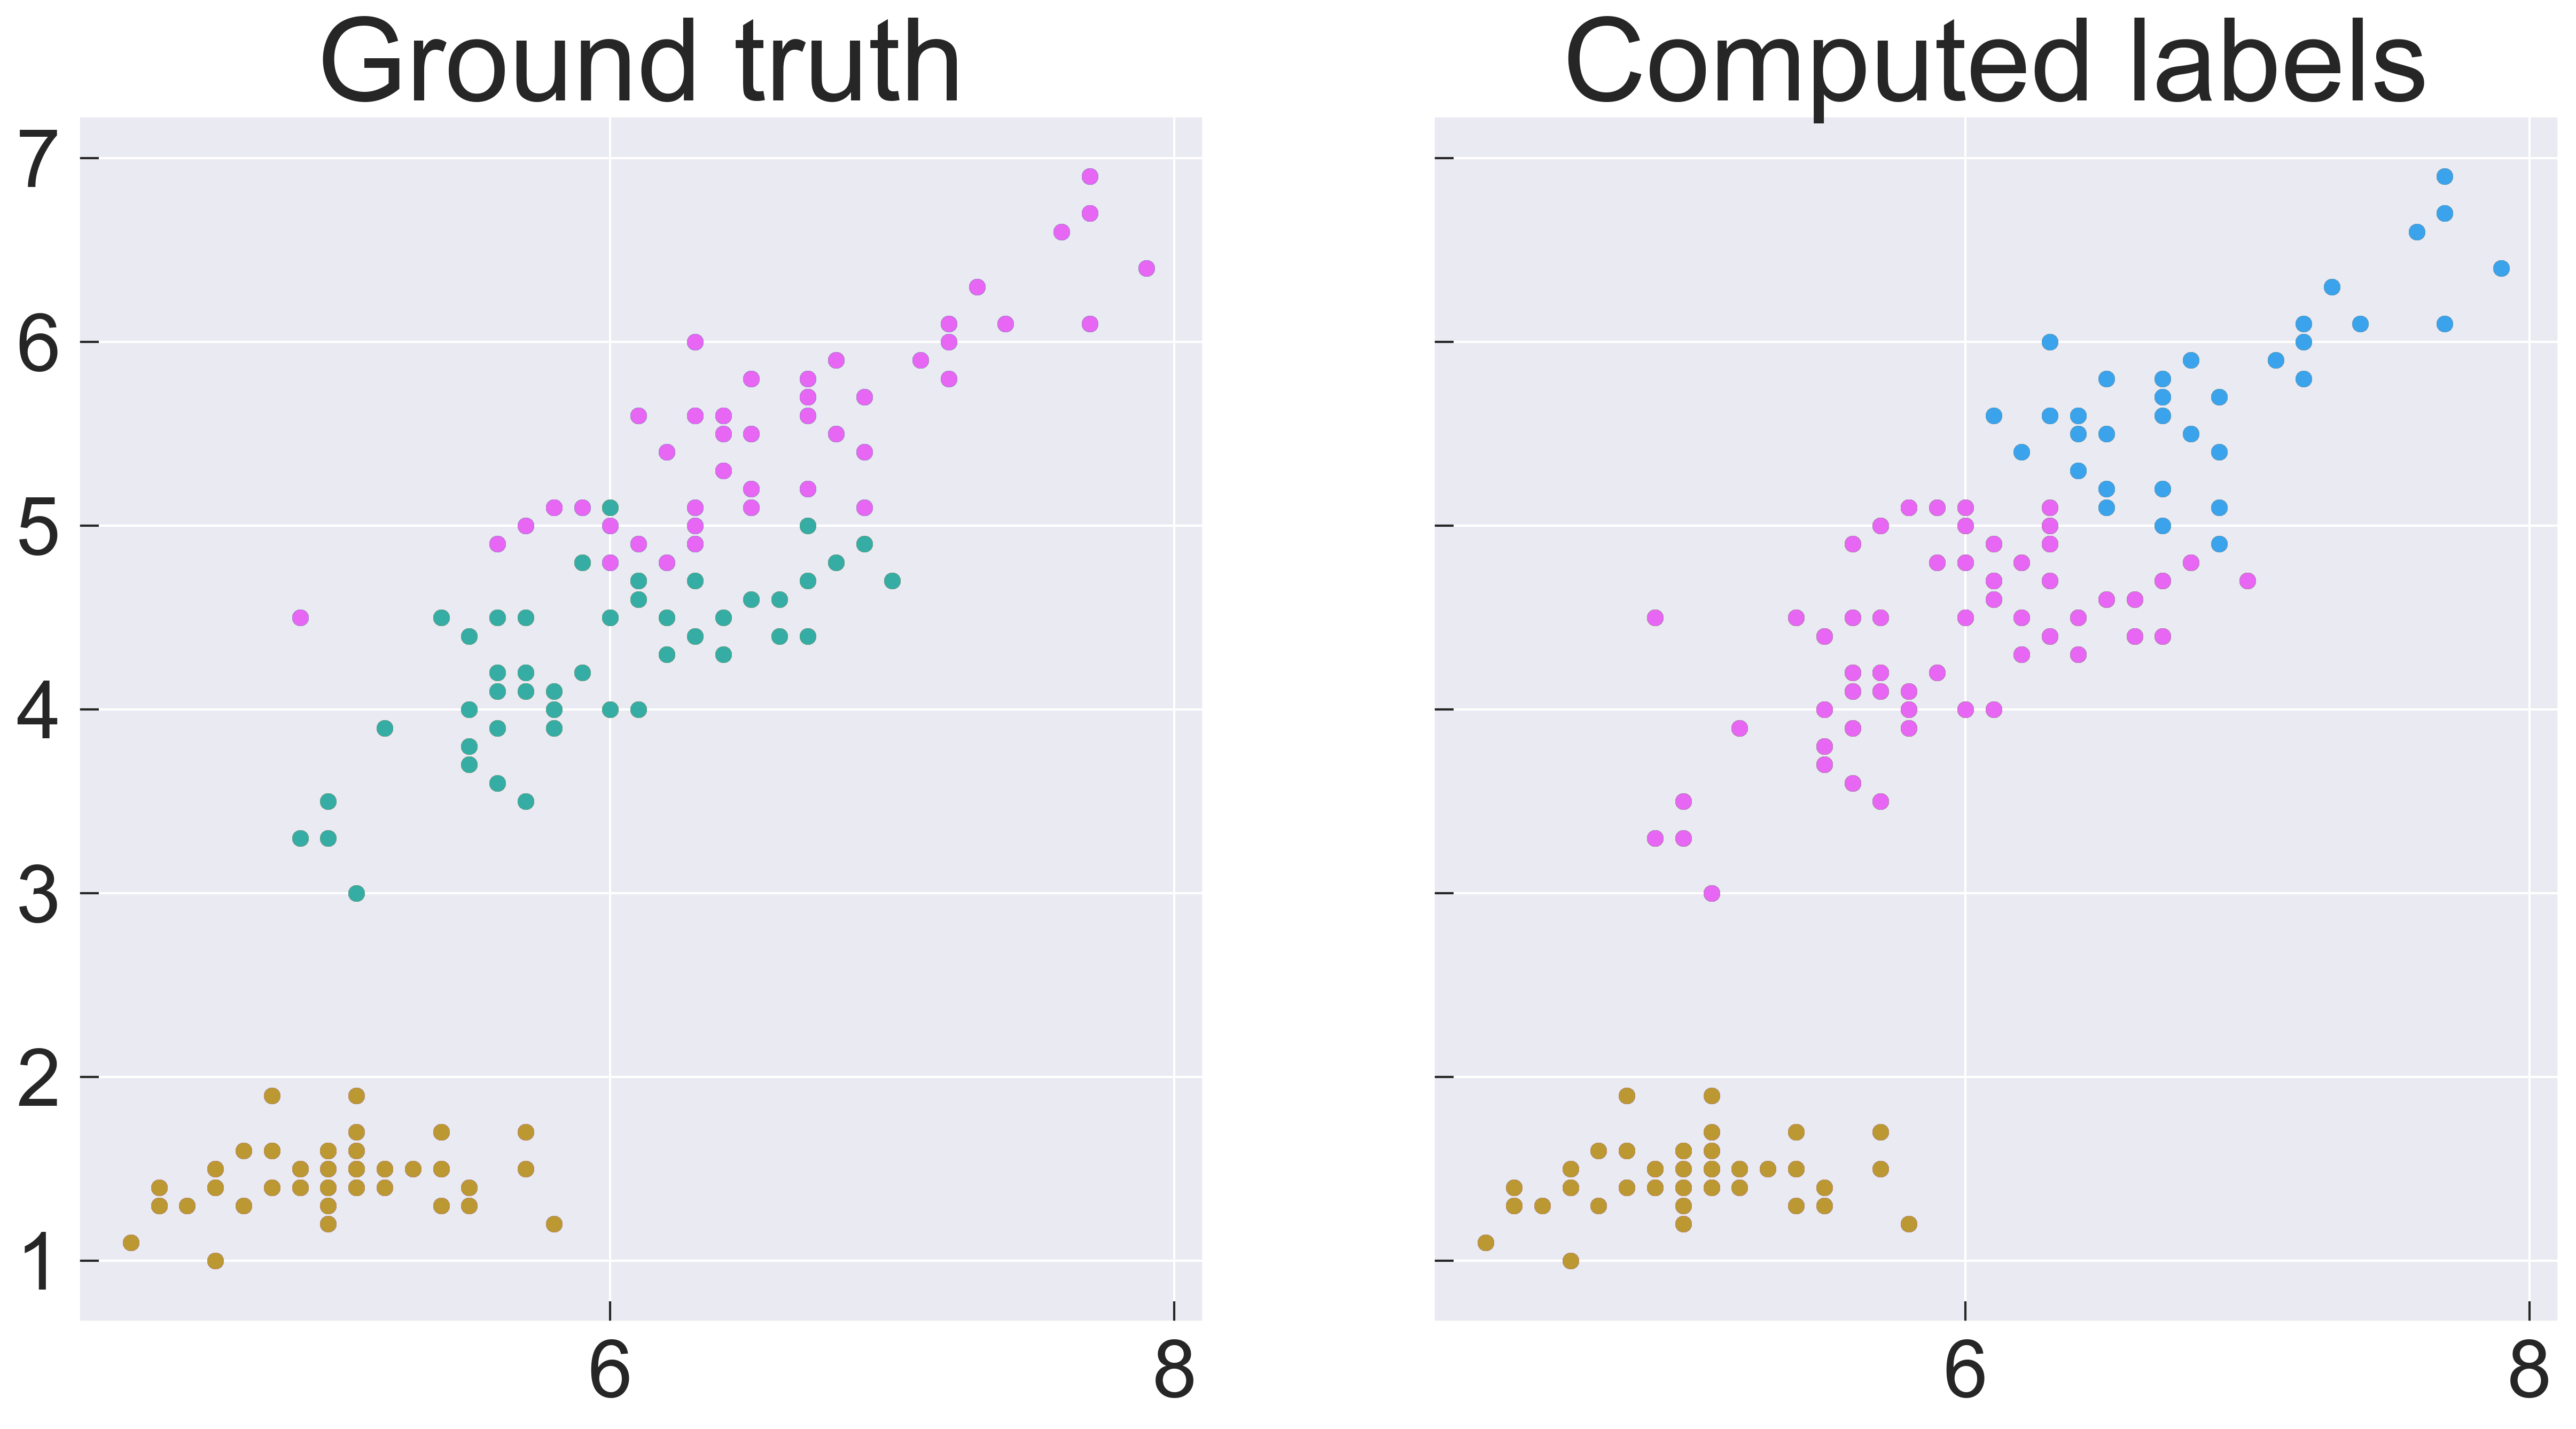

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(20,10))

for sp in species_list:
    dfsel = df[df['species'] == sp]
    ax1.scatter(dfsel['sepal_length'], dfsel['petal_length'])
    ax1.set_title('Ground truth')
    
for label in computed_label_list:
    dfsel = df[df['computed_label'] == label]
    ax2.scatter(dfsel['sepal_length'], dfsel['petal_length'])
    ax2.set_title('Computed labels')

## Visualizing the decision boundaries

In [25]:
data = df.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = cl.KMeans(init='k-means++', n_clusters=3, n_init=3)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(2,2))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=80, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the iris dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross', fontsize = '5')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Mini batch K-means:
"
Alternative online implementation that does incremental updates of the centers positions using mini-batches. For large scale learning (say n_samples > 10k) MiniBatchKMeans is probably much faster than the default batch implementation.
"

<div style="text-align: right"> - <a target='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html/'> scikit-learn documentation </a></div>


In [9]:
mkm = cl.MiniBatchKMeans(n_clusters=num_species)

In [11]:
mkm.fit(df.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=3,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [12]:
df.loc[:, 'computed_label'] = mkm.labels_
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,computed_label
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [13]:
species_list = tuple(df['species'])
computed_label_list = tuple(df['computed_label'])

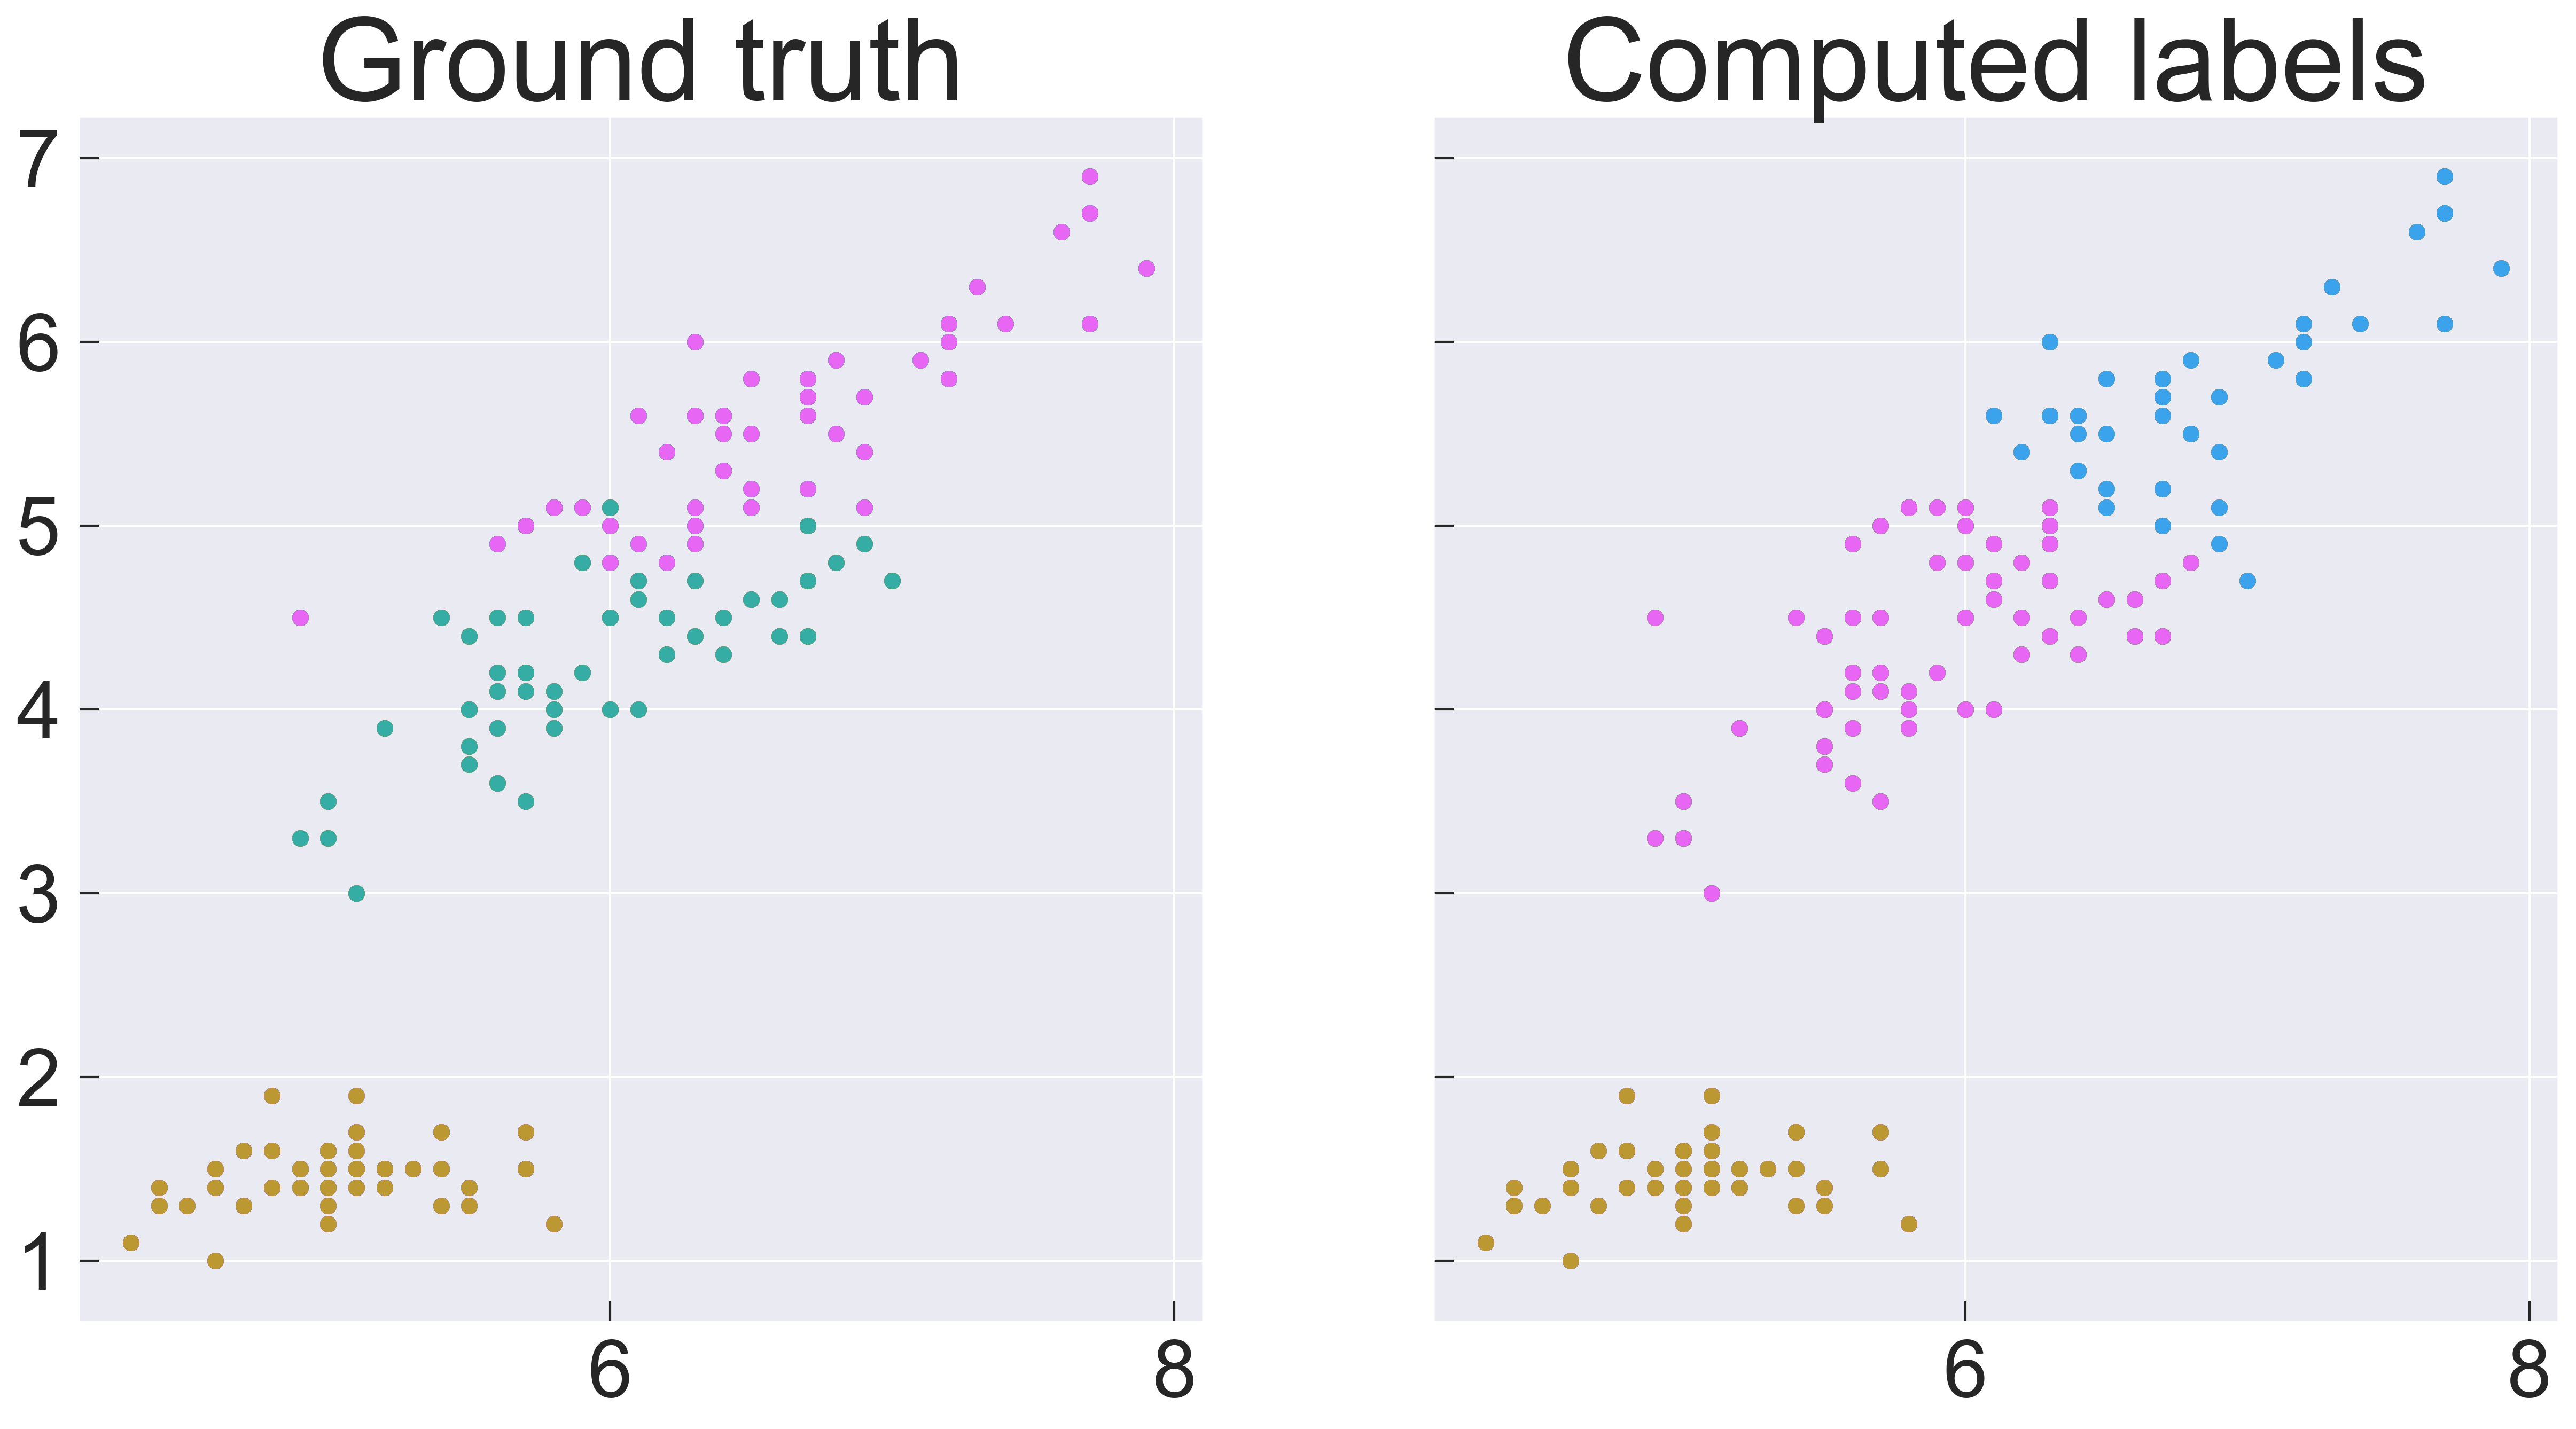

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(20,10))

for sp in species_list:
    dfsel = df[df['species'] == sp]
    ax1.scatter(dfsel['sepal_length'], dfsel['petal_length'])
    ax1.set_title('Ground truth')

for label in computed_label_list:
    dfsel = df[df['computed_label'] == label]
    ax2.scatter(dfsel['sepal_length'], dfsel['petal_length'])
    ax2.set_title('Computed labels')

## Hierarchical clustering

In [99]:
bigcities = pd.read_hdf('data/germany_cities.hdf', key = 'city')

In [100]:
bigcities.head()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
722416,de,aachen,Aachen,7,251104.0,50.770833,6.105278
725123,de,augsburg,Augsburg,2,261842.0,48.366667,10.883333
727047,de,bergisch gladbach,Bergisch Gladbach,7,106611.0,50.983333,7.133333
727152,de,berlin,Berlin,16,3398362.0,52.516667,13.400000
727693,de,bielefeld,Bielefeld,7,327198.0,52.033333,8.533333


In [101]:
dat = bigcities.loc[:, ['Longitude','Latitude']]

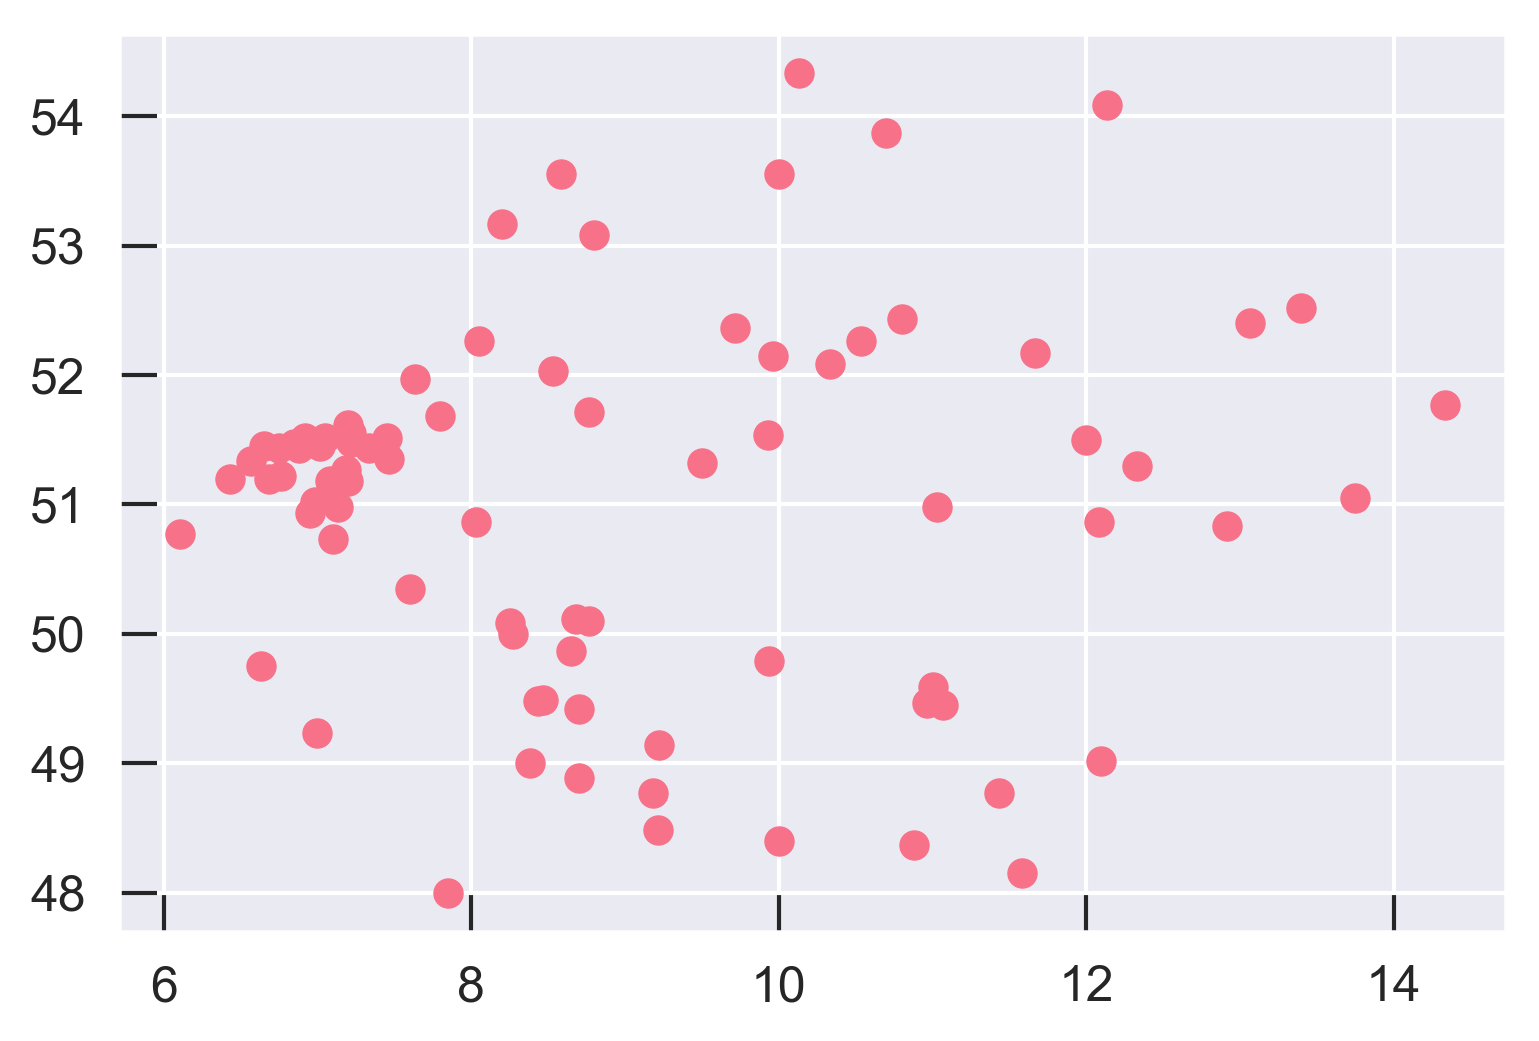

In [102]:
plt.scatter(dat.loc[:,'Longitude'], dat.loc[:,'Latitude'])

In [57]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [63]:
Z = linkage(dat, 'ward')

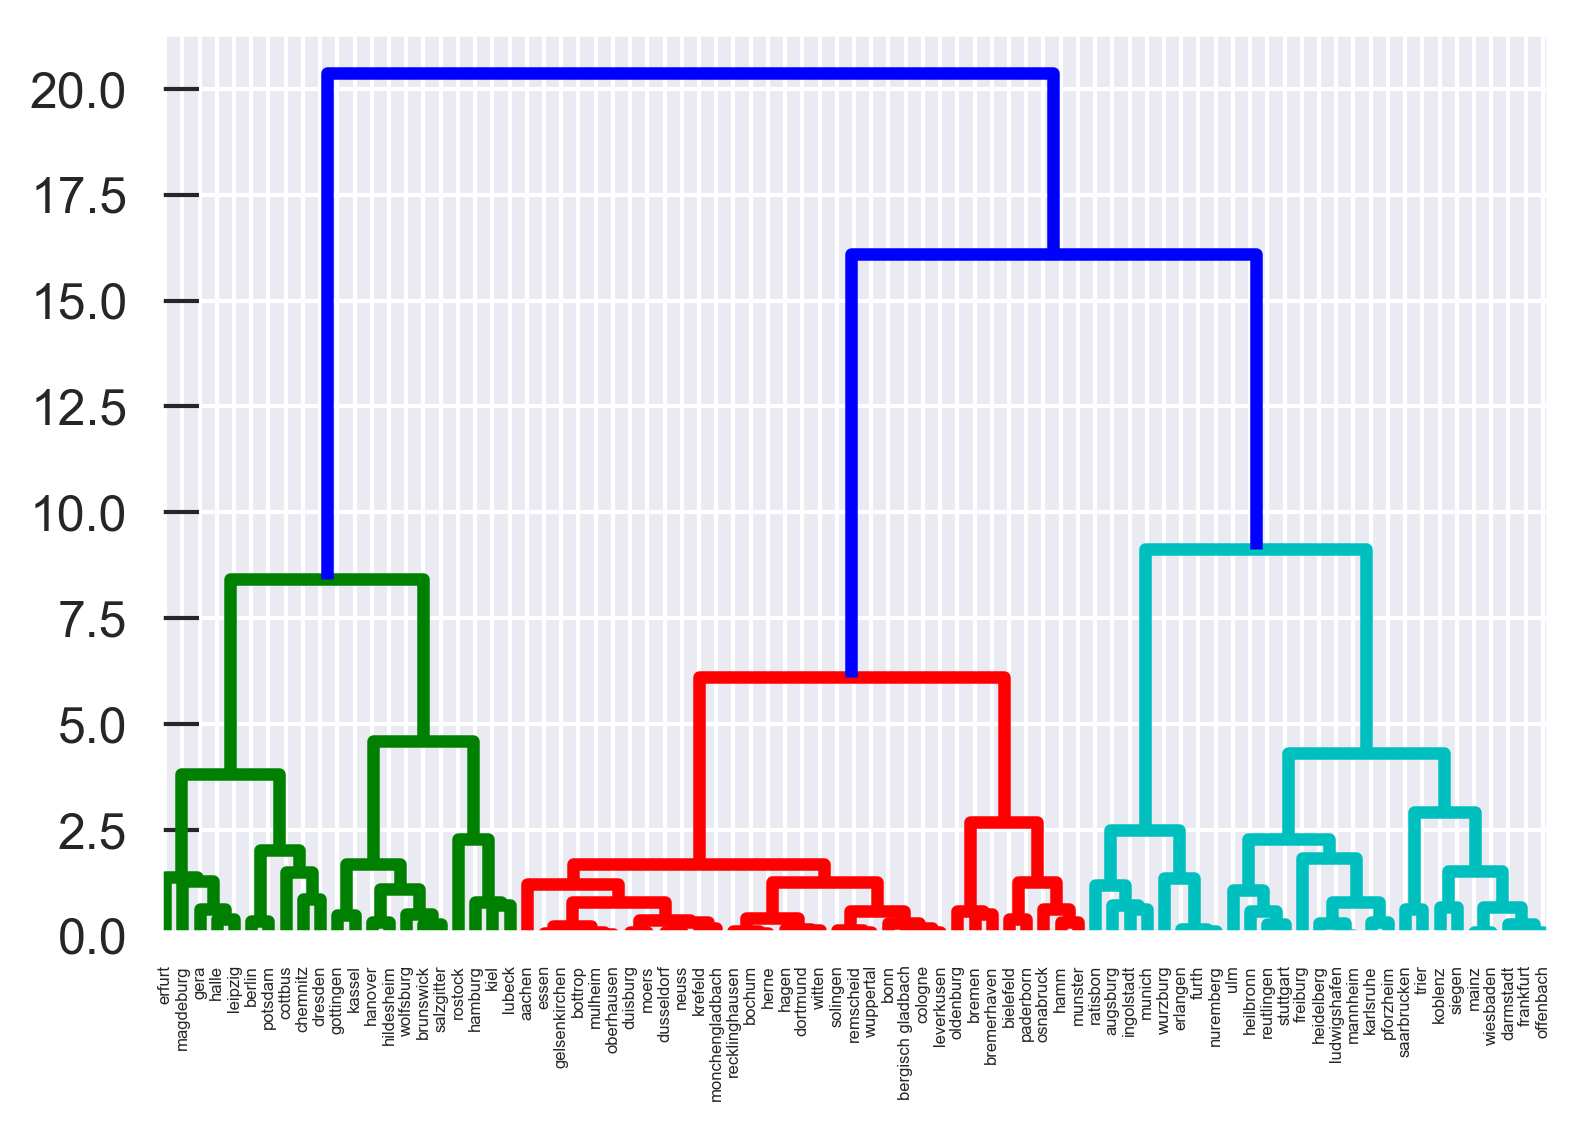

In [76]:
_ = dendrogram(Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=4.,  # font size for the x axis labels
    labels = list(bigcities.loc[:,'City'])
)

**Caveat:** Since our data coordinates are latitude and longitude, the default distance metric will be *definitely unsuitable*. Ideally, we would use [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula) to get the actual distances.

### Now get the actual clusters

In [92]:
from scipy.cluster.hierarchy import fcluster
max_d = 7.5
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 4, 3, 1, 3, 3, 3, 3, 3, 3, 2, 1, 3, 1, 5, 3, 1, 3, 3, 1, 4, 3, 5,
       5, 4, 3, 1, 2, 3, 1, 2, 3, 2, 5, 5, 3, 2, 4, 5, 2, 2, 5, 3, 1, 3, 2,
       5, 1, 5, 5, 3, 3, 3, 4, 3, 3, 4, 3, 5, 3, 3, 3, 5, 1, 4, 3, 3, 5, 2,
       5, 2, 5, 3, 5, 5, 5, 5, 3, 2, 3, 4], dtype=int32)

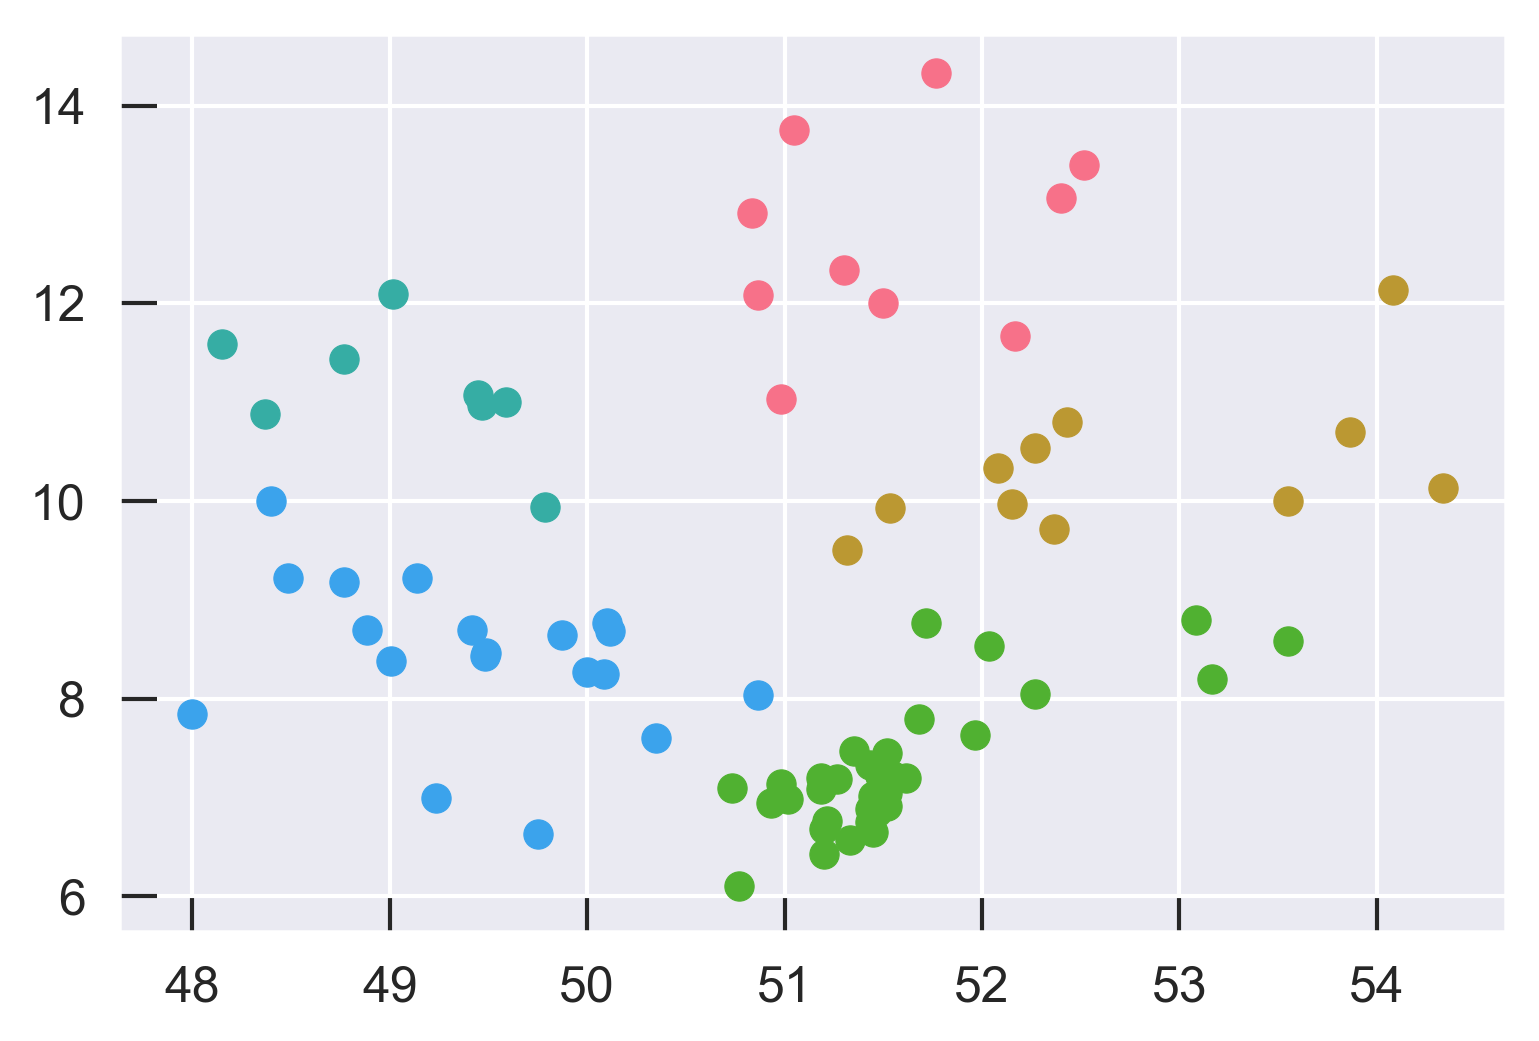

In [93]:
for label in set(clusters):
    idxs = (clusters==label)
    plt.scatter(dat.loc[idxs,'Latitude'], dat.loc[idxs,'Longitude'])
    
#plot some city labels


# Exercises 

Use `beautifulsoup`and `pd.read_csv` to obtain worldwide statistics of countries according to at least three criteria, e.g.
* GDP per capita.
* Life expectancy.
* HDI index. 


1. Now, using all combinations of two criteria among these, compute clustering of the countries. 
2. Plot the datapoints by plt.scatter. Try to identify which countries fall in which cluster.
3. On the same plot, plot the country names as well (look at ax.text in matplotlib documentation). It might also be better to sample a subset of the countries.